# Customer Life-Time-Value Prediction 

### Introduction
In the realm of business analytics and marketing, understanding the value of a customer over their entire relationship with a company is crucial. Customer Life-Time Value (LTV) is a predictive metric that estimates the total revenue a business can expect from a single customer account throughout its lifespan. This metric helps businesses allocate resources effectively, tailor marketing strategies, and make informed decisions about customer acquisition and retention.

### Definition of Customer Life-Time Value (LTV)
Customer Life-Time Value (LTV) refers to the total revenue a business generates from a customer during their engagement with the company. It provides insights into the long-term value of customers, enabling businesses to focus on strategies that maximize this value. LTV is often used to assess the profitability of customer acquisition and retention strategies.

### Methods to Estimate Customer LTV
Historical Calculation: This method involves calculating the average revenue generated by a customer in the past and multiplying it by the average customer lifespan. It is straightforward but may not account for future changes in customer behavior.

Predictive Modeling: This approach uses statistical and machine learning models to forecast future customer value based on historical data and various customer characteristics. Techniques include:

Regression Analysis: Models the relationship between customer characteristics and their expected revenue.
Classification Algorithms: Predicts customer segments that are likely to be high-value.
Survival Analysis: Estimates the time until a customer’s account becomes inactive.
Cohort Analysis: This method examines the behavior and revenue patterns of different customer cohorts over time to estimate LTV.

Customer Segmentation: By grouping customers based on similar traits or behaviors, businesses can estimate LTV for each segment and tailor strategies accordingly.

About the Dataset
About Dataset 



In [1]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import datetime
from datetime import datetime
np.random.seed(42)

In [4]:
df = pd.read_excel("online_retail.xlsx", sheet_name = ["Year 2009-2010", "Year 2010-2011"])

In [5]:
df['Year 2009-2010']

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                    ...    ...          ...             ...  
525456 2010-12-09 20:01:00   2.95      17530.0  United Kingdom  
525457 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525458 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525459 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525460 2010-12-09 20:01:00   1.95      17530.0  United Kingdom  

[525461 rows x 8 columns]

In [6]:
merged_df = pd.concat([df['Year 2009-2010'], df['Year 2010-2011']])

There are above 1million rows in the dataset. But above 250thousand rows have invoice-id as null, which makes them useless. So we have to remove those rows. 

In [7]:
data = merged_df

In [8]:
data

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                    ...    ...          ...             ...  
541905 2011-12-09 12:50:00   2.10      12680.0          France  
541906 2011-12-09 12:50:00   4.15      12680.0          France  
541907 2011-12-09 12:50:00   4.15      12680.0          France  
541908 2011-12-09 12:50:00   4.95      12680.0          France  
541909 2011-12-09 12:50:00  18.00      12680.0          France  

[1067371 rows x 8 columns]

In [9]:
data.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [10]:
data.dropna(subset=[ 'Customer ID'],inplace=True)

In [11]:
data.shape

(824364, 8)

In [12]:
import plotly.express as px

In [13]:
countries_df = pd.DataFrame(data['Country'].value_counts()).reset_index()

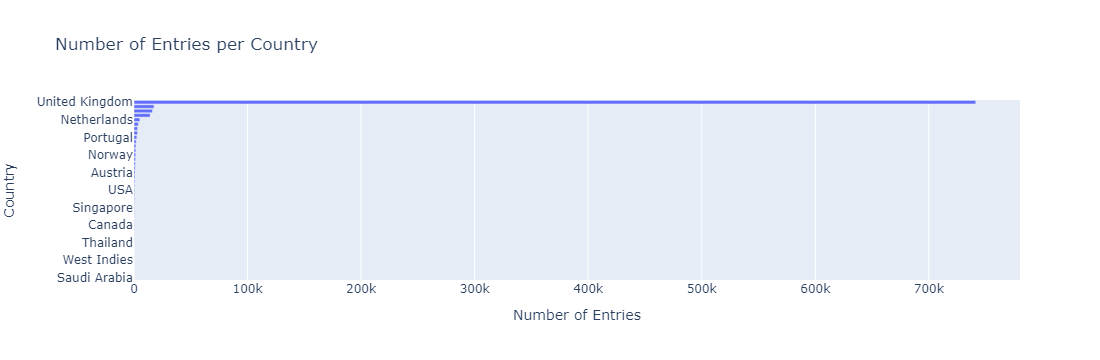

In [14]:

fig = px.bar(countries_df, x='count', y='Country', orientation='h', title='Number of Entries per Country')

fig.update_layout(
    xaxis_title='Number of Entries',
    yaxis_title='Country',
    yaxis=dict(autorange="reversed") 
)

fig.show()

A large number of entries are from UK, followed by Netherland and Portugal

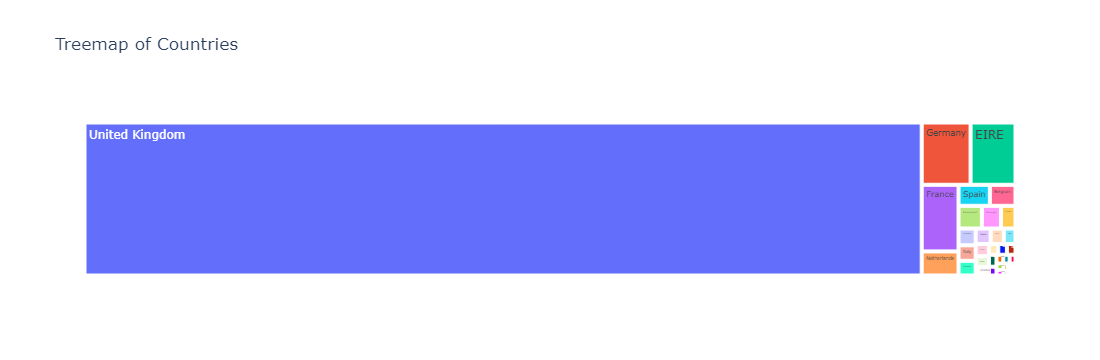

In [15]:
fig = px.treemap(countries_df, path=['Country'], values='count', title='Treemap of Countries')
fig.show()

In [16]:
data.nunique()

Invoice        44876
StockCode       4646
Description     5299
Quantity         643
InvoiceDate    41439
Price           1022
Customer ID     5942
Country           41
dtype: int64

In [17]:
data.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [18]:
# Average Value of Each Transaction 
data['Price'].mean()

3.6767995788268304

In [19]:
# Average Quantity Ordered
data['Quantity'].mean()

12.414574144431343

In [20]:
# Group-By Invoice and Price-> This gives total shopping value done on each invoice
sum_price_order = data.groupby('Invoice')['Price'].sum().reset_index().sort_values(by='Price',ascending=False)

In [21]:
# Average Price Per Invoice(Order) 
sum_price_order['Price'].mean()

67.54214297174435

In [22]:
data['Quantity']=abs(data['Quantity'])

In [23]:
# Group-By Invoice and Quantity-> This gives total quantity shopped  on each invoice
sum_quantity_order = data.groupby('Invoice')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)

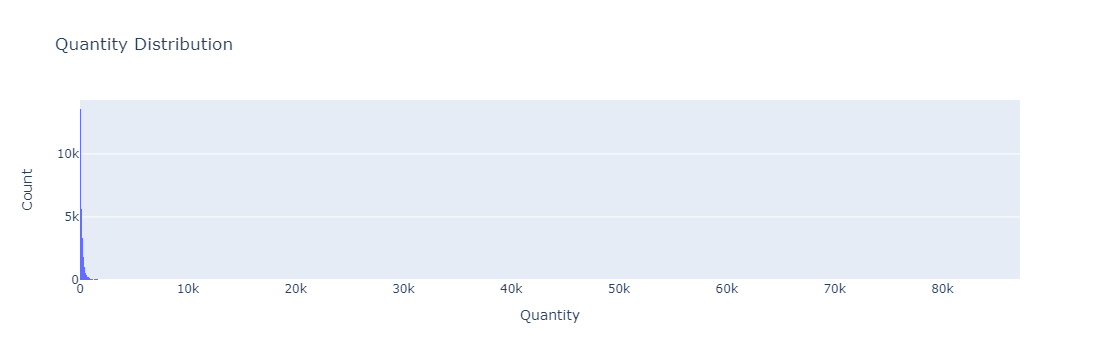

In [24]:
fig = px.histogram(sum_quantity_order, x='Quantity', title='Quantity Distribution')

fig.update_layout(
    xaxis_title='Quantity',
    yaxis_title='Count'
)

fig.show()

In [25]:
# Group-By Invoice and Price-> This gives count of types of  items shopped  on each invoice
count_quantity_order = data.groupby('Invoice')['Quantity'].count().reset_index().sort_values(by='Quantity',ascending=False)

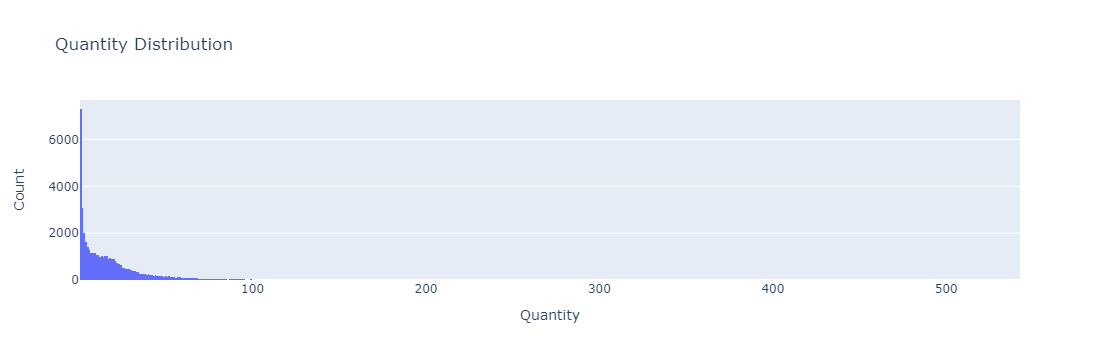

In [26]:
fig = px.histogram(count_quantity_order, x='Quantity', title='Quantity Distribution')

fig.update_layout(
    xaxis_title='Quantity',
    yaxis_title='Count'
)

fig.show()

In [27]:
countries = data["Country"].unique()

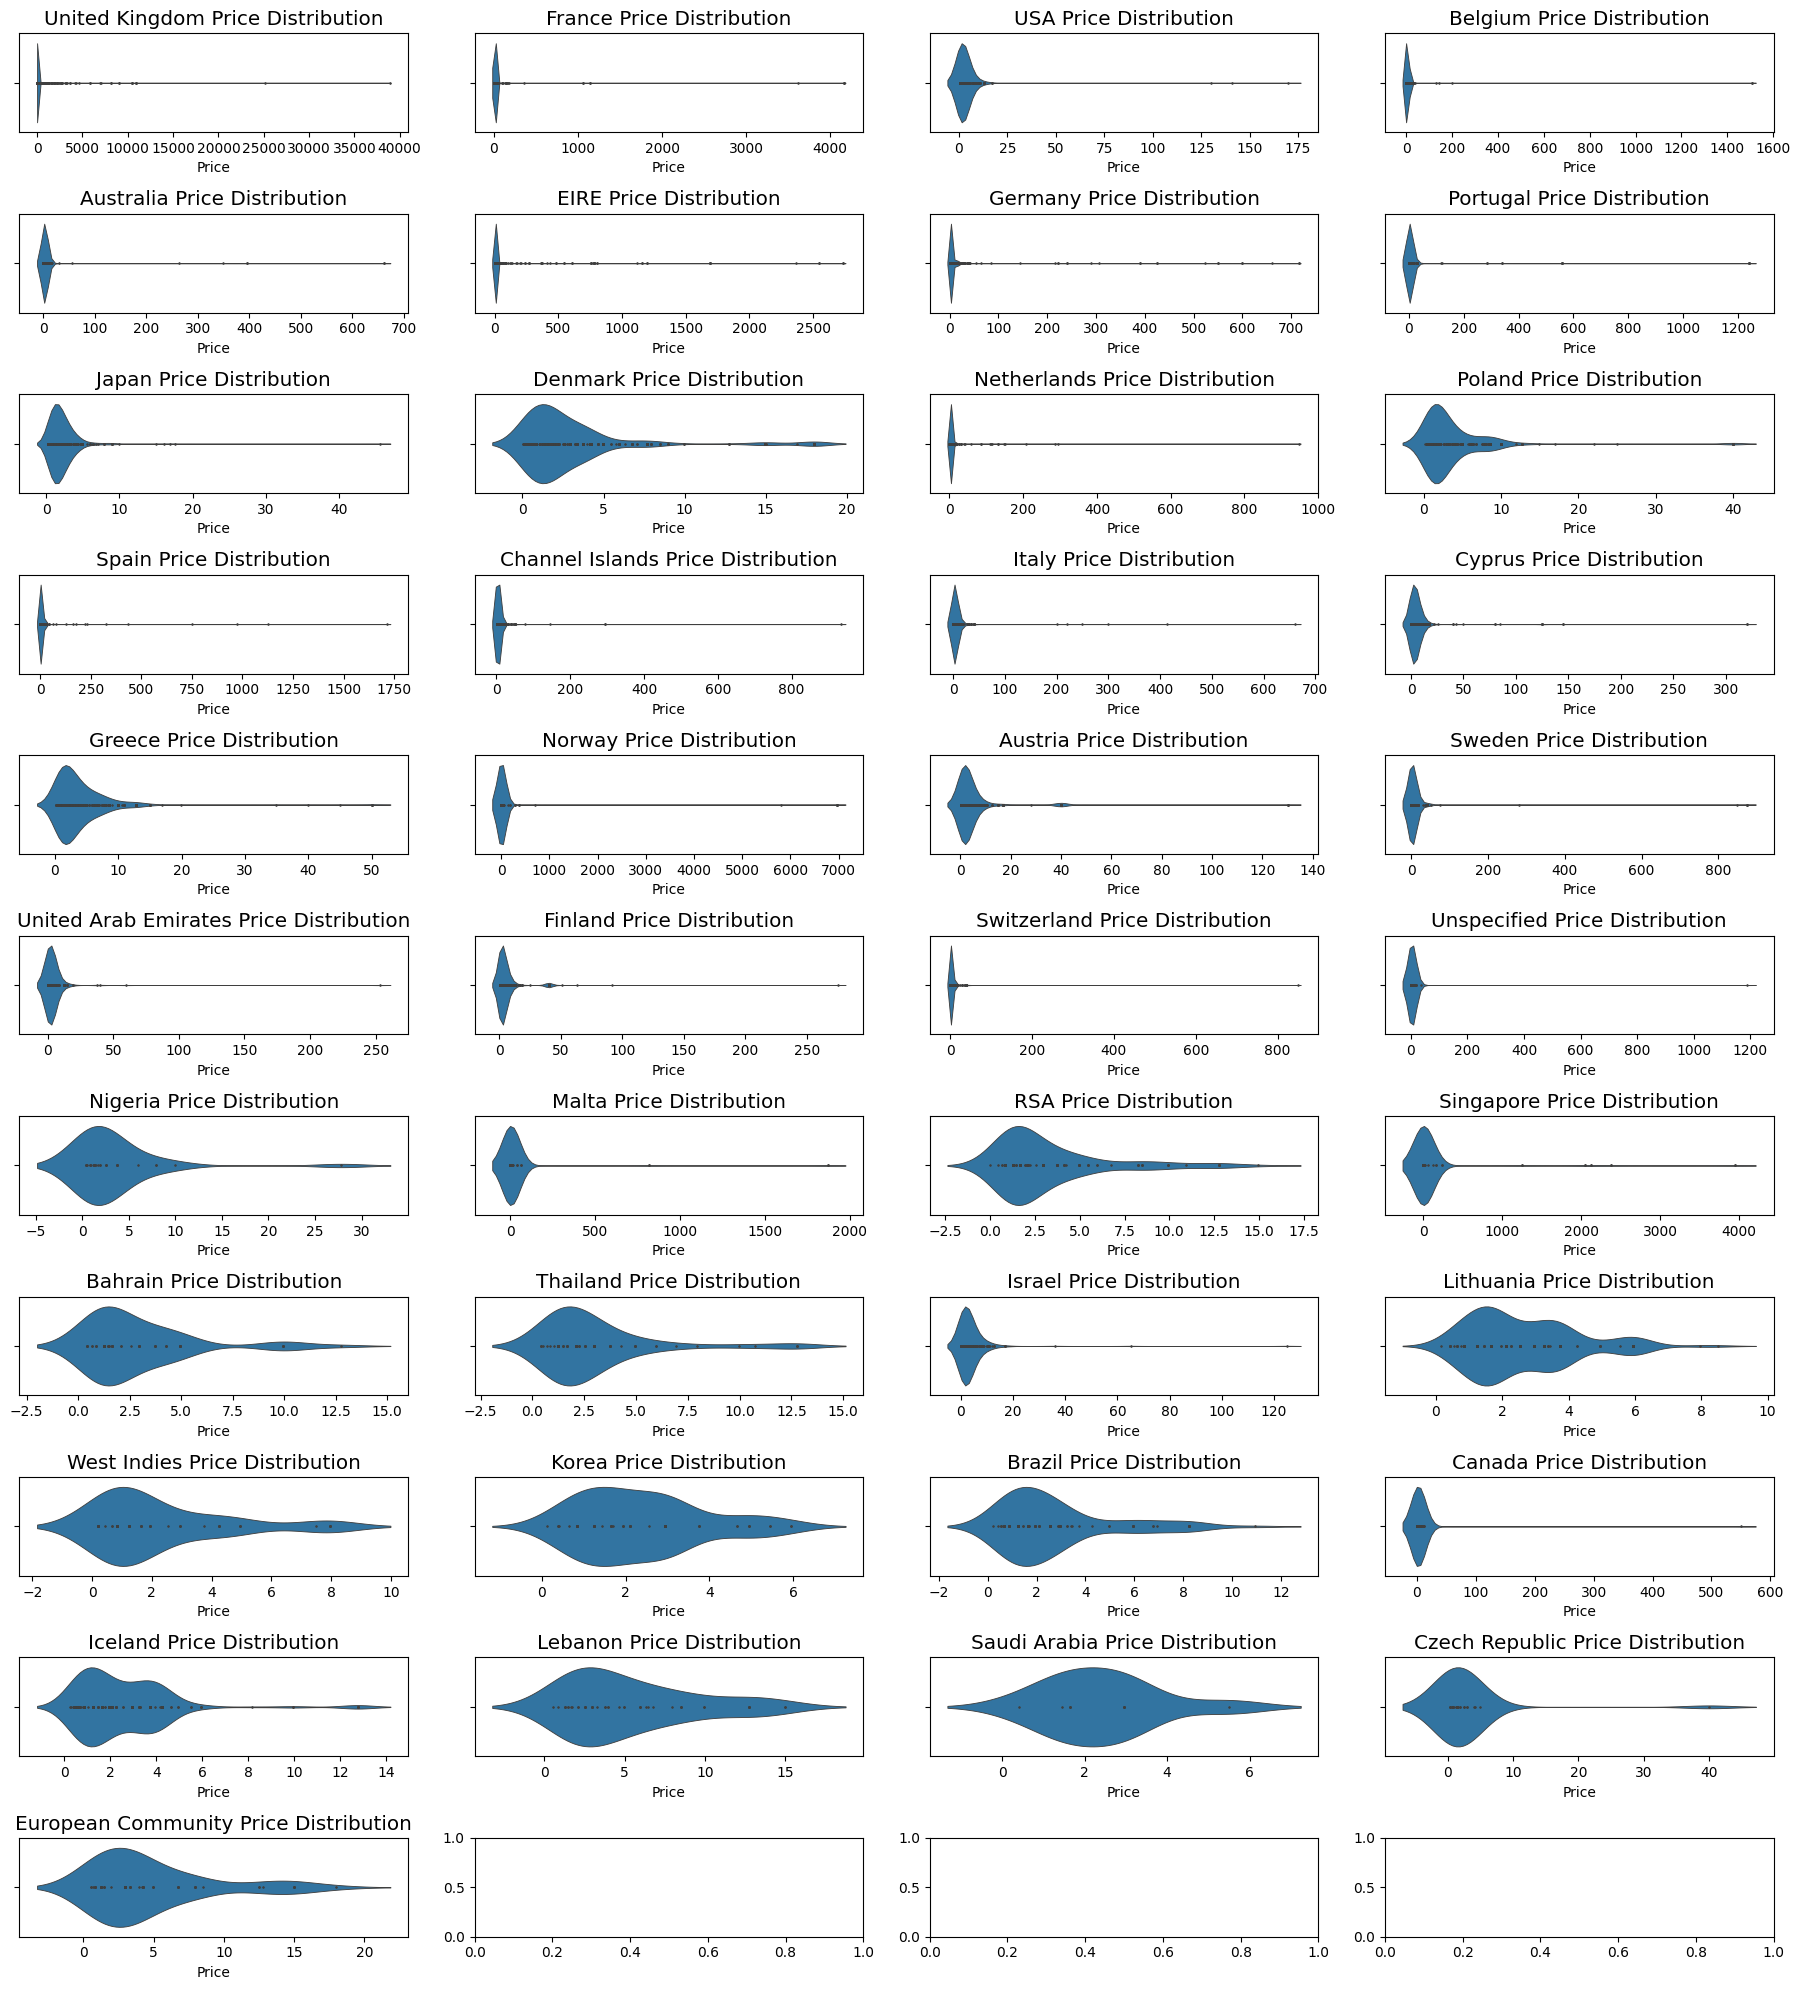

In [28]:
# Price Distribution Country Wise 

fig, ax = plt.subplots(11, 4, figsize=(18,20))
plt.style.use("ggplot")
for i, c in enumerate(countries):
    row = i // 4
    col = i % 4
    sns.violinplot(x="Price", data=data[data["Country"] == c], ax=ax[row, col], inner="point")
    ax[row, col].set_title(c + ' ' + "Price Distribution")

plt.tight_layout()
plt.show()

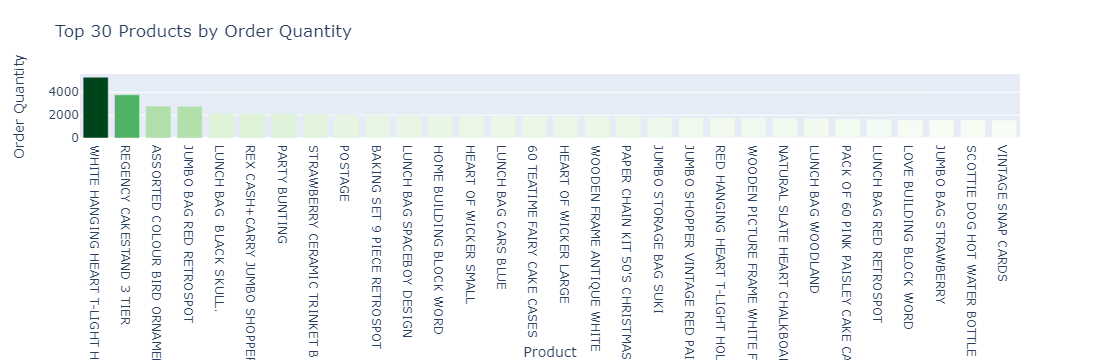

In [29]:
grouped_data = pd.DataFrame(data.groupby("Description").count().sort_values(by = "Quantity", ascending = False).head(30)["Quantity"]).reset_index()
fig = px.bar(grouped_data, x='Description', y='Quantity', title='Top 30 Products by Order Quantity', color='Quantity', color_continuous_scale='Greens')
fig.update_layout(
    xaxis_title='Product',
    yaxis_title='Order Quantity',
    coloraxis_showscale=False  # Hide the color scale
)

fig.show()

In [30]:
data

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                    ...    ...          ...             ...  
541905 2011-12-09 12:50:00   2.10      12680.0          France  
541906 2011-12-09 12:50:00   4.15      12680.0          France  
541907 2011-12-09 12:50:00   4.15      12680.0          France  
541908 2011-12-09 12:50:00   4.95      12680.0          France  
541909 2011-12-09 12:50:00  18.00      12680.0          France  

[824364 rows x 8 columns]

In [31]:
from datetime import datetime
data['year']=data['InvoiceDate'].dt.year
data['month']=data['InvoiceDate'].dt.month
data['day']=data['InvoiceDate'].dt.day
data['hour']=data['InvoiceDate'].dt.hour
data['quarter']= data['InvoiceDate'].dt.quarter
data['weekday']=data['InvoiceDate'].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").strftime("%A"))


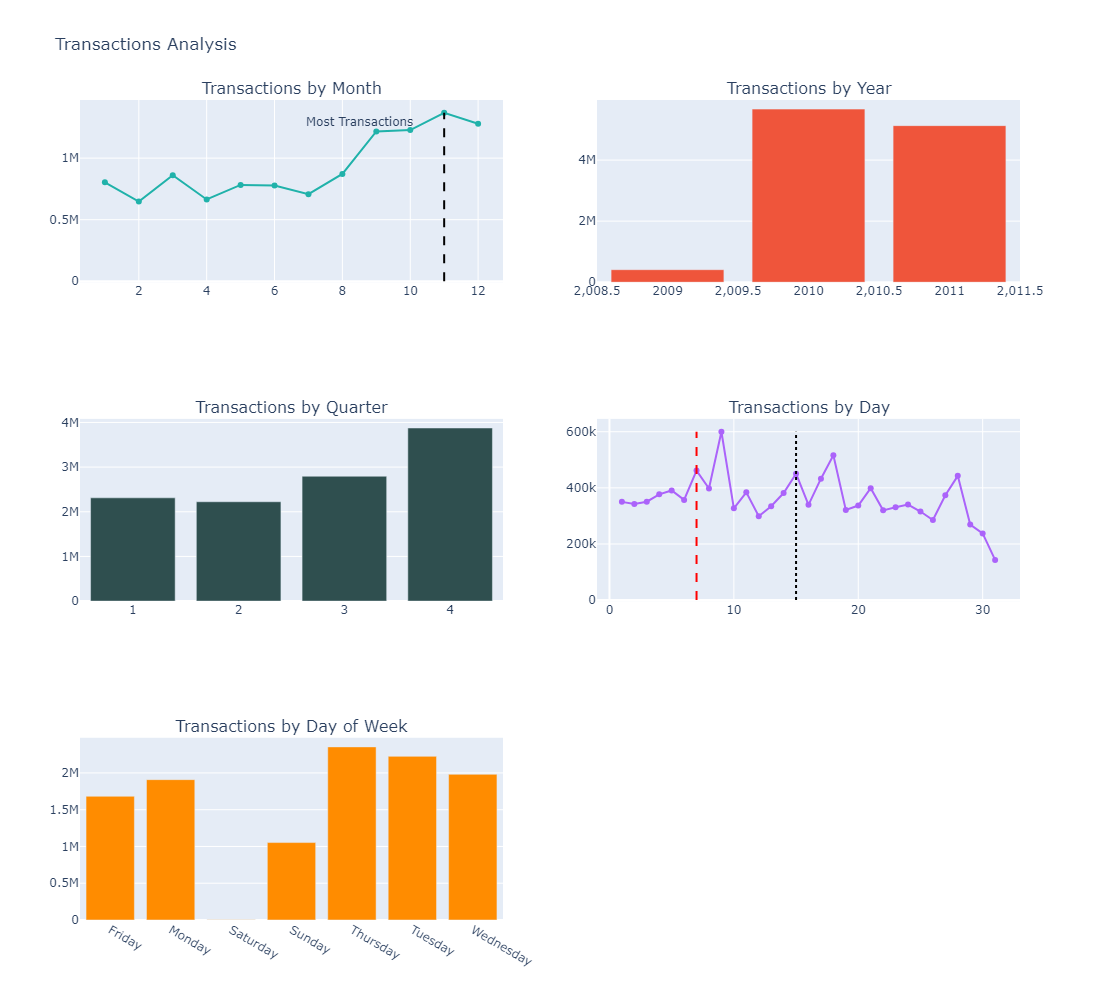

In [32]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Sample data
# Grouping the data as required
monthly_data = data.groupby("month").sum("Quantity").reset_index()
yearly_data = data.groupby("year")["Quantity"].sum().reset_index()
quarterly_data = data.groupby("quarter")["Quantity"].sum().reset_index()
daily_data = data.groupby("day").sum("Quantity").reset_index()
weekday_data = data.groupby("weekday")["Quantity"].sum().reset_index()

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=("Transactions by Month", "Transactions by Year",
                                                    "Transactions by Quarter", "Transactions by Day",
                                                    "Transactions by Day of Week"))

# Transactions by Month
fig.add_trace(go.Scatter(x=monthly_data['month'], y=monthly_data['Quantity'], mode='lines+markers', 
                         marker=dict(color='lightseagreen'), name='Transactions by Month'), row=1, col=1)
fig.add_shape(type='line', x0=11, y0=0, x1=11, y1=monthly_data['Quantity'].max(), line=dict(color='black', dash='dash'),
              row=1, col=1)
fig.add_annotation(x=8.5, y=1.3e6, text="Most Transactions", showarrow=False, row=1, col=1)

# Transactions by Year
fig.add_trace(go.Bar(x=yearly_data['year'], y=yearly_data['Quantity'], name='Transactions by Year'), row=1, col=2)

# Transactions by Quarter
fig.add_trace(go.Bar(x=quarterly_data['quarter'], y=quarterly_data['Quantity'], marker=dict(color='darkslategrey'), 
                     name='Transactions by Quarter'), row=2, col=1)

# Transactions by Day
fig.add_trace(go.Scatter(x=daily_data['day'], y=daily_data['Quantity'], mode='lines+markers', 
                         name='Transactions by Day'), row=2, col=2)
fig.add_shape(type='line', x0=7, y0=0, x1=7, y1=daily_data['Quantity'].max(), line=dict(color='red', dash='dash'),
              row=2, col=2)
fig.add_shape(type='line', x0=15, y0=0, x1=15, y1=daily_data['Quantity'].max(), line=dict(color='black', dash='dot'),
              row=2, col=2)

# Transactions by Day of Week
fig.add_trace(go.Bar(x=weekday_data['weekday'], y=weekday_data['Quantity'], marker=dict(color='darkorange'), 
                     name='Transactions by Day of Week'), row=3, col=1)

# Update layout
fig.update_layout(height=1000, width=1100, title_text="Transactions Analysis", showlegend=False)
fig.show()


In [33]:
data.groupby("year")['Quantity'].sum()

year
2009     410116
2010    5669291
2011    5128307
Name: Quantity, dtype: int64

In [34]:
data.groupby("month")['Quantity'].sum()  # Total Orders 
data.groupby("month")['Quantity'].count()  # Total Transactions 

month
1      44351
2      44269
3      60936
4      51031
5      58512
6      59786
7      55248
8      54604
9      76208
10    101256
11    127088
12     91075
Name: Quantity, dtype: int64

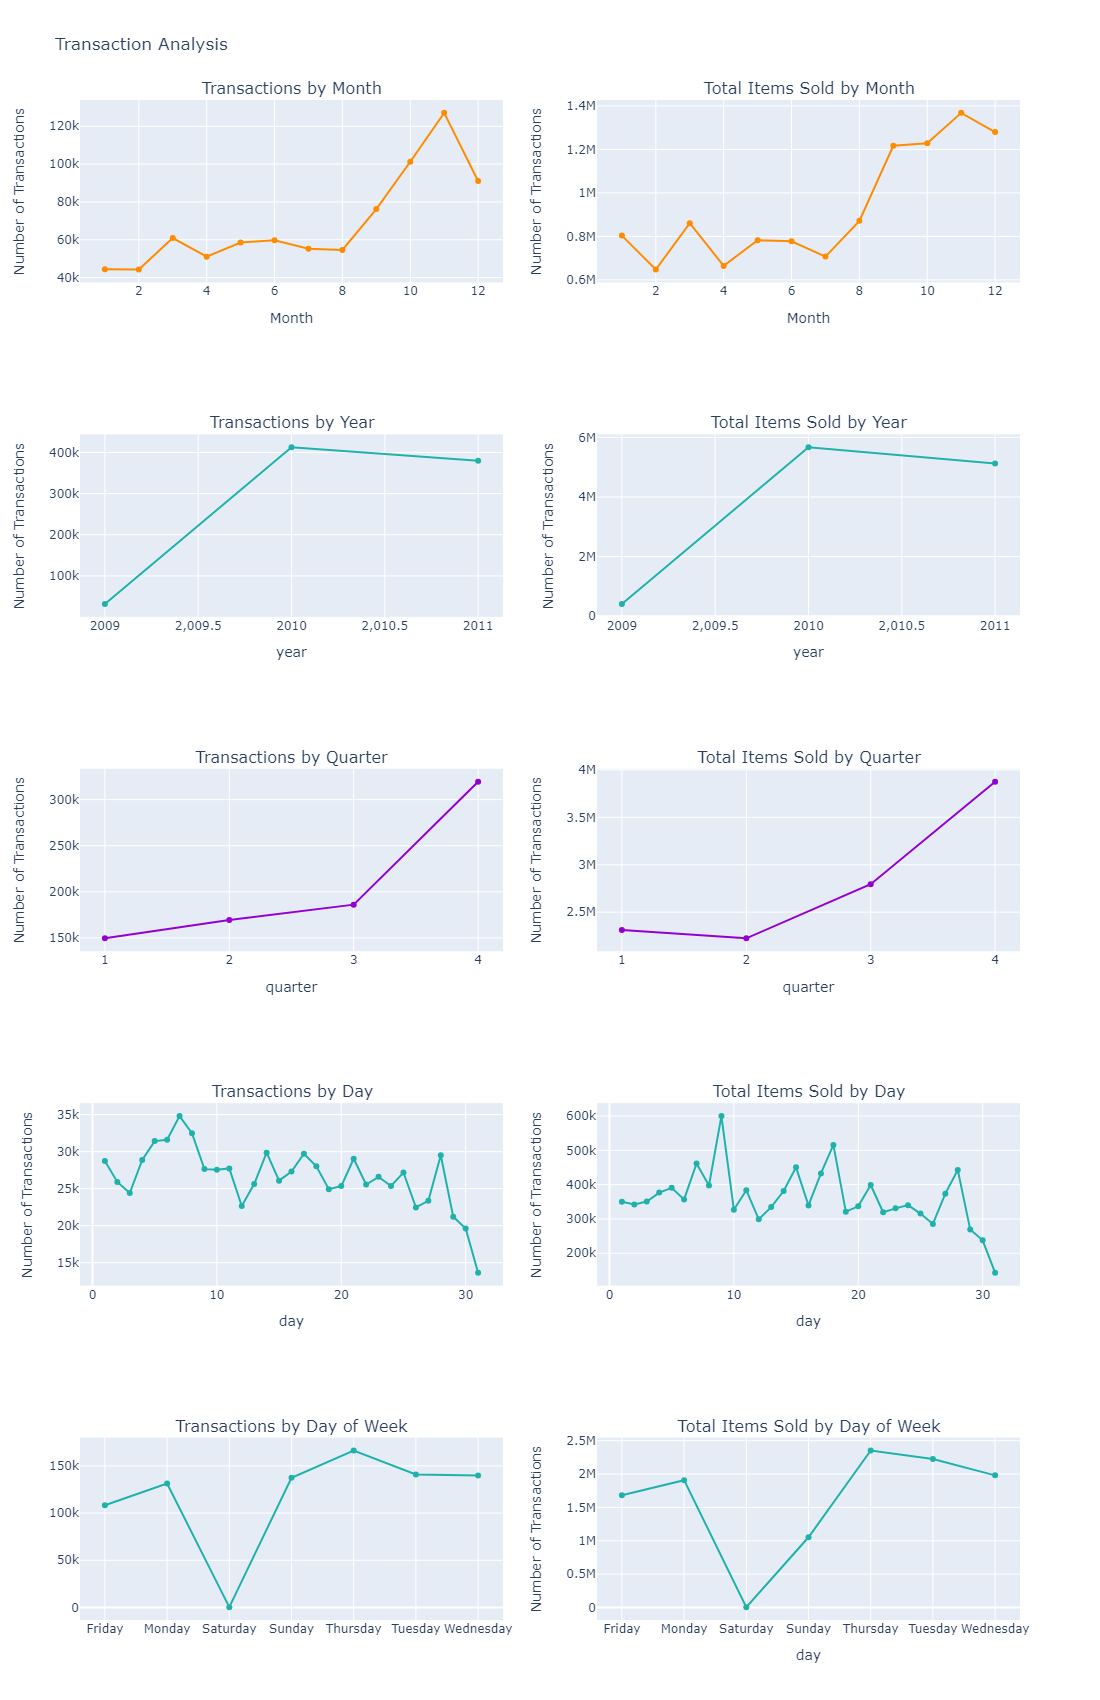

In [35]:
# Create subplots with two columns
fig = make_subplots(rows=5, cols=2, subplot_titles=("Transactions by Month", "Total Items Sold by Month",
                                                    "Transactions by Year", "Total Items Sold by Year",
                                                    "Transactions by Quarter", "Total Items Sold by Quarter",
                                                    "Transactions by Day", "Total Items Sold by Day",
                                                    "Transactions by Day of Week", "Total Items Sold by Day of Week"))

# Plot 1-2:  Month
fig.add_trace(go.Scatter(
    x=data.groupby("month").count().index,
    y=data.groupby("month")['Quantity'].count(),
    mode='lines+markers',
    marker=dict(color='darkorange'),
    name='Transactions'
), row=1, col=1)

fig.update_xaxes(title_text='Month', row=1, col=1)
fig.update_yaxes(title_text='Number of Transactions', row=1, col=1)

fig.add_trace(go.Scatter(
    x=data.groupby("month").count().index,
    y=data.groupby("month")['Quantity'].sum() ,
    mode='lines+markers',
    marker=dict(color='darkorange'),
    name='Total Items'
), row=1, col=2)

fig.update_xaxes(title_text='Month', row=1, col=2)
fig.update_yaxes(title_text='Number of Transactions', row=1, col=2)

# 2.Plot 1-2: Year
fig.add_trace(go.Scatter(
    x=data.groupby("year").count().index,
    y=data.groupby("year")['Quantity'].count(),
    mode='lines+markers',
    marker=dict(color='lightseagreen'),
    name='Transactions'
), row=2, col=1)

fig.update_xaxes(title_text='year', row=2, col=1)
fig.update_yaxes(title_text='Number of Transactions', row=2, col=1)

fig.add_trace(go.Scatter(
    x=data.groupby("year").count().index,
    y=data.groupby("year")['Quantity'].sum() ,
    mode='lines+markers',
    marker=dict(color='lightseagreen'),
    name='Total Items'
), row=2, col=2)

fig.update_xaxes(title_text='year', row=2, col=2)
fig.update_yaxes(title_text='Number of Transactions', row=2, col=2)





# 3.Plot 1-2: Quarter

fig.add_trace(go.Scatter(
    x=data.groupby("quarter").count().index,
    y=data.groupby("quarter")['Quantity'].count(),
    mode='lines+markers',
    marker=dict(color='darkviolet'),
    name='Transactions'
), row=3, col=1)

fig.update_xaxes(title_text='quarter', row=3, col=1)
fig.update_yaxes(title_text='Number of Transactions', row=3, col=1)

fig.add_trace(go.Scatter(
    x=data.groupby("quarter").count().index,
    y=data.groupby("quarter")['Quantity'].sum() ,
    mode='lines+markers',
    marker=dict(color='darkviolet'),
    name='Total Items'
), row=3, col=2)

fig.update_xaxes(title_text='quarter', row=3, col=2)
fig.update_yaxes(title_text='Number of Transactions', row=3, col=2)


# 4.Plot 1-2: Quarter

fig.add_trace(go.Scatter(
    x=data.groupby("day").count().index,
    y=data.groupby("day")['Quantity'].count(),
    mode='lines+markers',
    marker=dict(color='lightseagreen'),
    name='Transactions'
), row=4, col=1)

fig.update_xaxes(title_text='day', row=4, col=1)
fig.update_yaxes(title_text='Number of Transactions', row=4, col=1)

fig.add_trace(go.Scatter(
    x=data.groupby("day").count().index,
    y=data.groupby("day")['Quantity'].sum() ,
    mode='lines+markers',
    marker=dict(color='lightseagreen'),
    name='Total Items'
), row=4, col=2)

fig.update_xaxes(title_text='day', row=4, col=2)
fig.update_yaxes(title_text='Number of Transactions', row=4, col=2)


# 5.Plot 1-2: Quarter

fig.add_trace(go.Scatter(
    x=data.groupby("weekday").count().index,
    y=data.groupby("weekday")['Quantity'].count(),
    mode='lines+markers',
    marker=dict(color='lightseagreen'),
    name='Transactions'
), row=5, col=1)

fig.update_xaxes(title_text='day', row=4, col=1)
fig.update_yaxes(title_text='Number of Transactions', row=4, col=1)

fig.add_trace(go.Scatter(
    x=data.groupby("weekday").count().index,
    y=data.groupby("weekday")['Quantity'].sum() ,
    mode='lines+markers',
    marker=dict(color='lightseagreen'),
    name='Total Items'
), row=5, col=2)

fig.update_xaxes(title_text='day', row=5, col=2)
fig.update_yaxes(title_text='Number of Transactions', row=5, col=2)


fig.update_layout(height=1700, width=1200, title_text="Transaction Analysis", showlegend=False)

fig.show()

In [36]:
temp = data.groupby(["Country", "Description"])["Quantity"].sum()
temp = pd.DataFrame(temp)

In [37]:
list(data['Country'].value_counts()[:8].index)

['United Kingdom',
 'Germany',
 'EIRE',
 'France',
 'Netherlands',
 'Spain',
 'Belgium',
 'Switzerland']

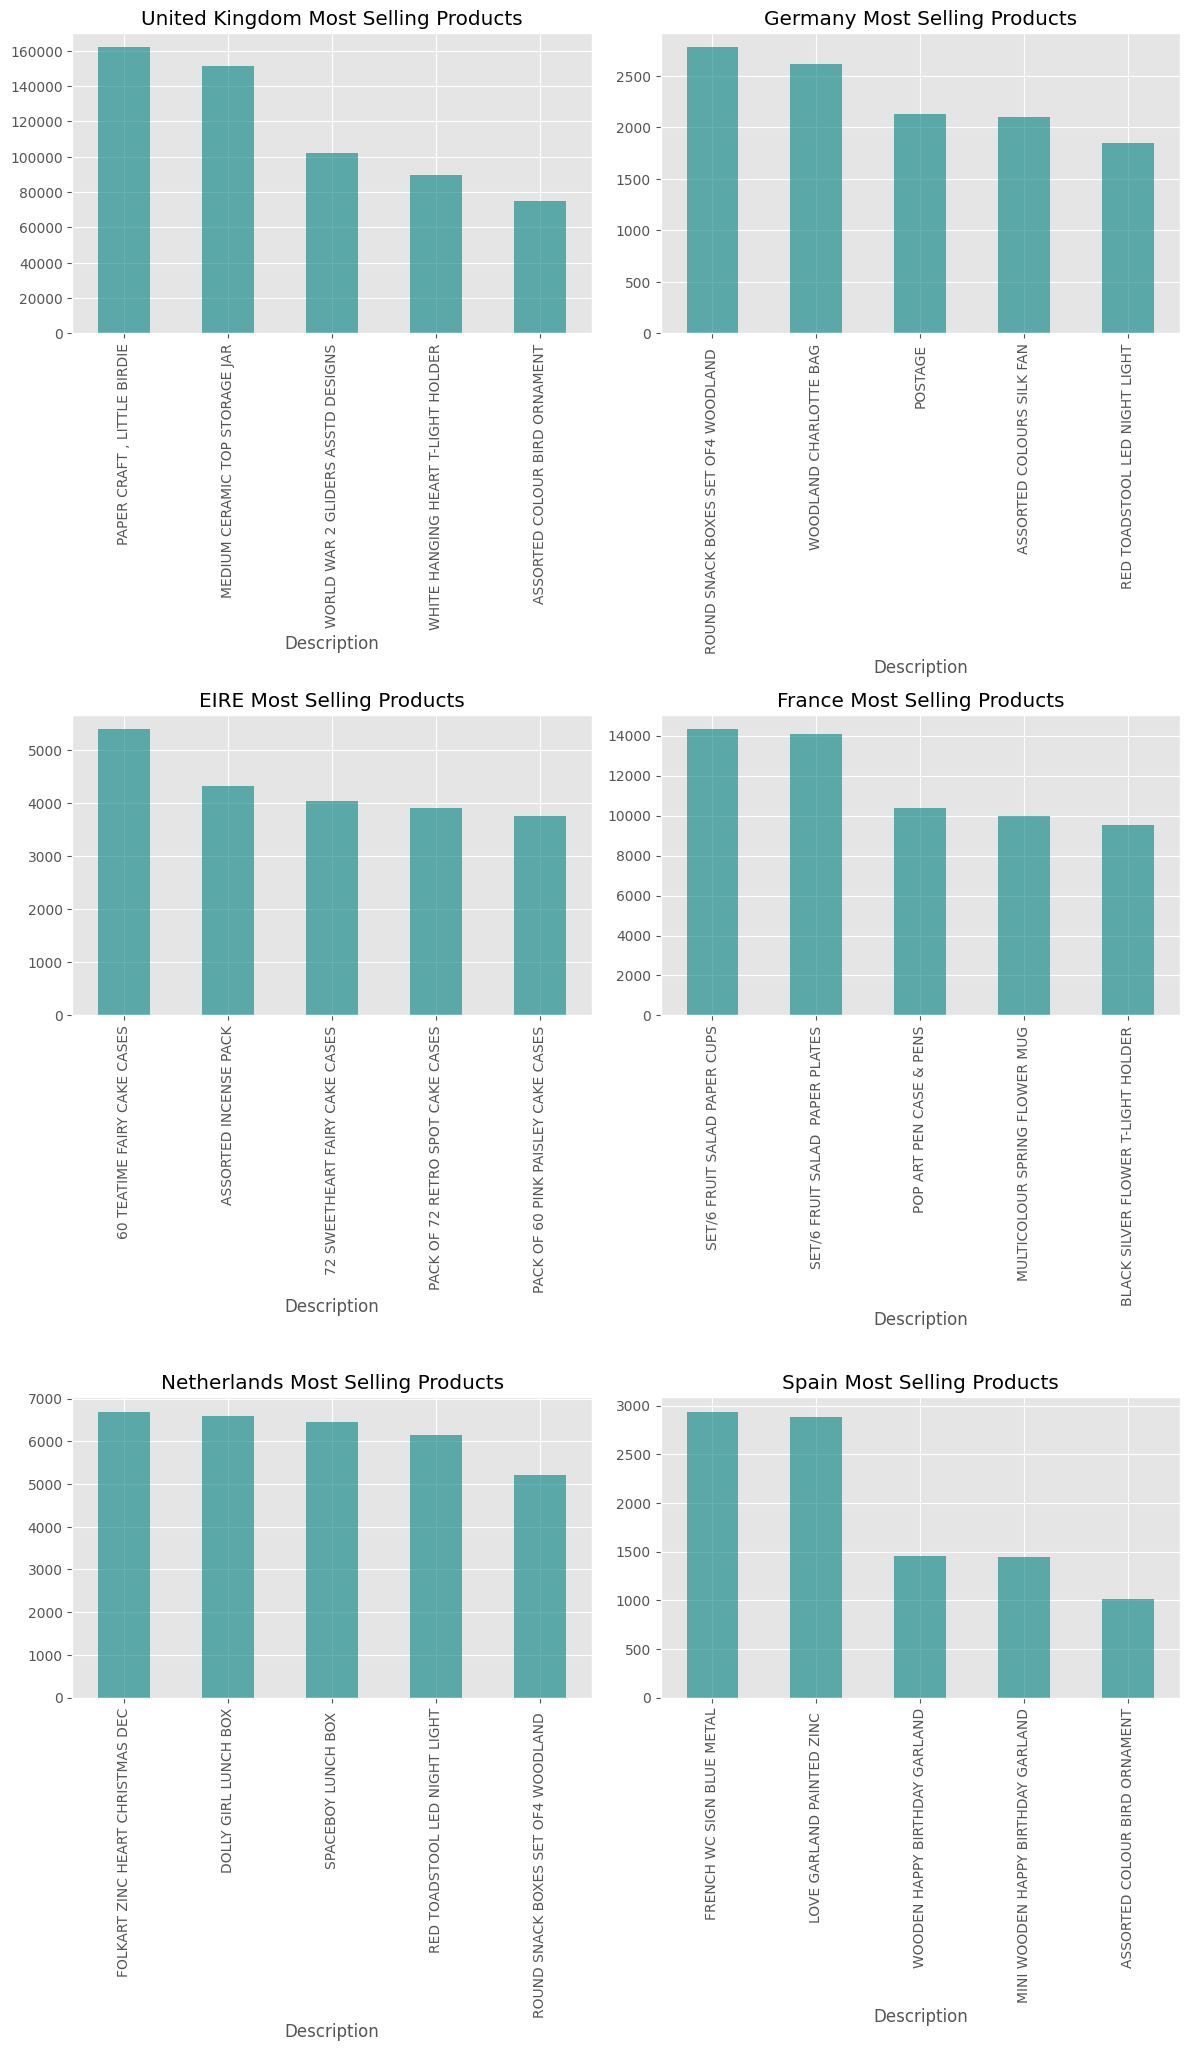

In [38]:
x = 1
top_six = list(data['Country'].value_counts()[:6].index)
plt.figure(figsize=(12,24))
for x, c in enumerate(top_six):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()

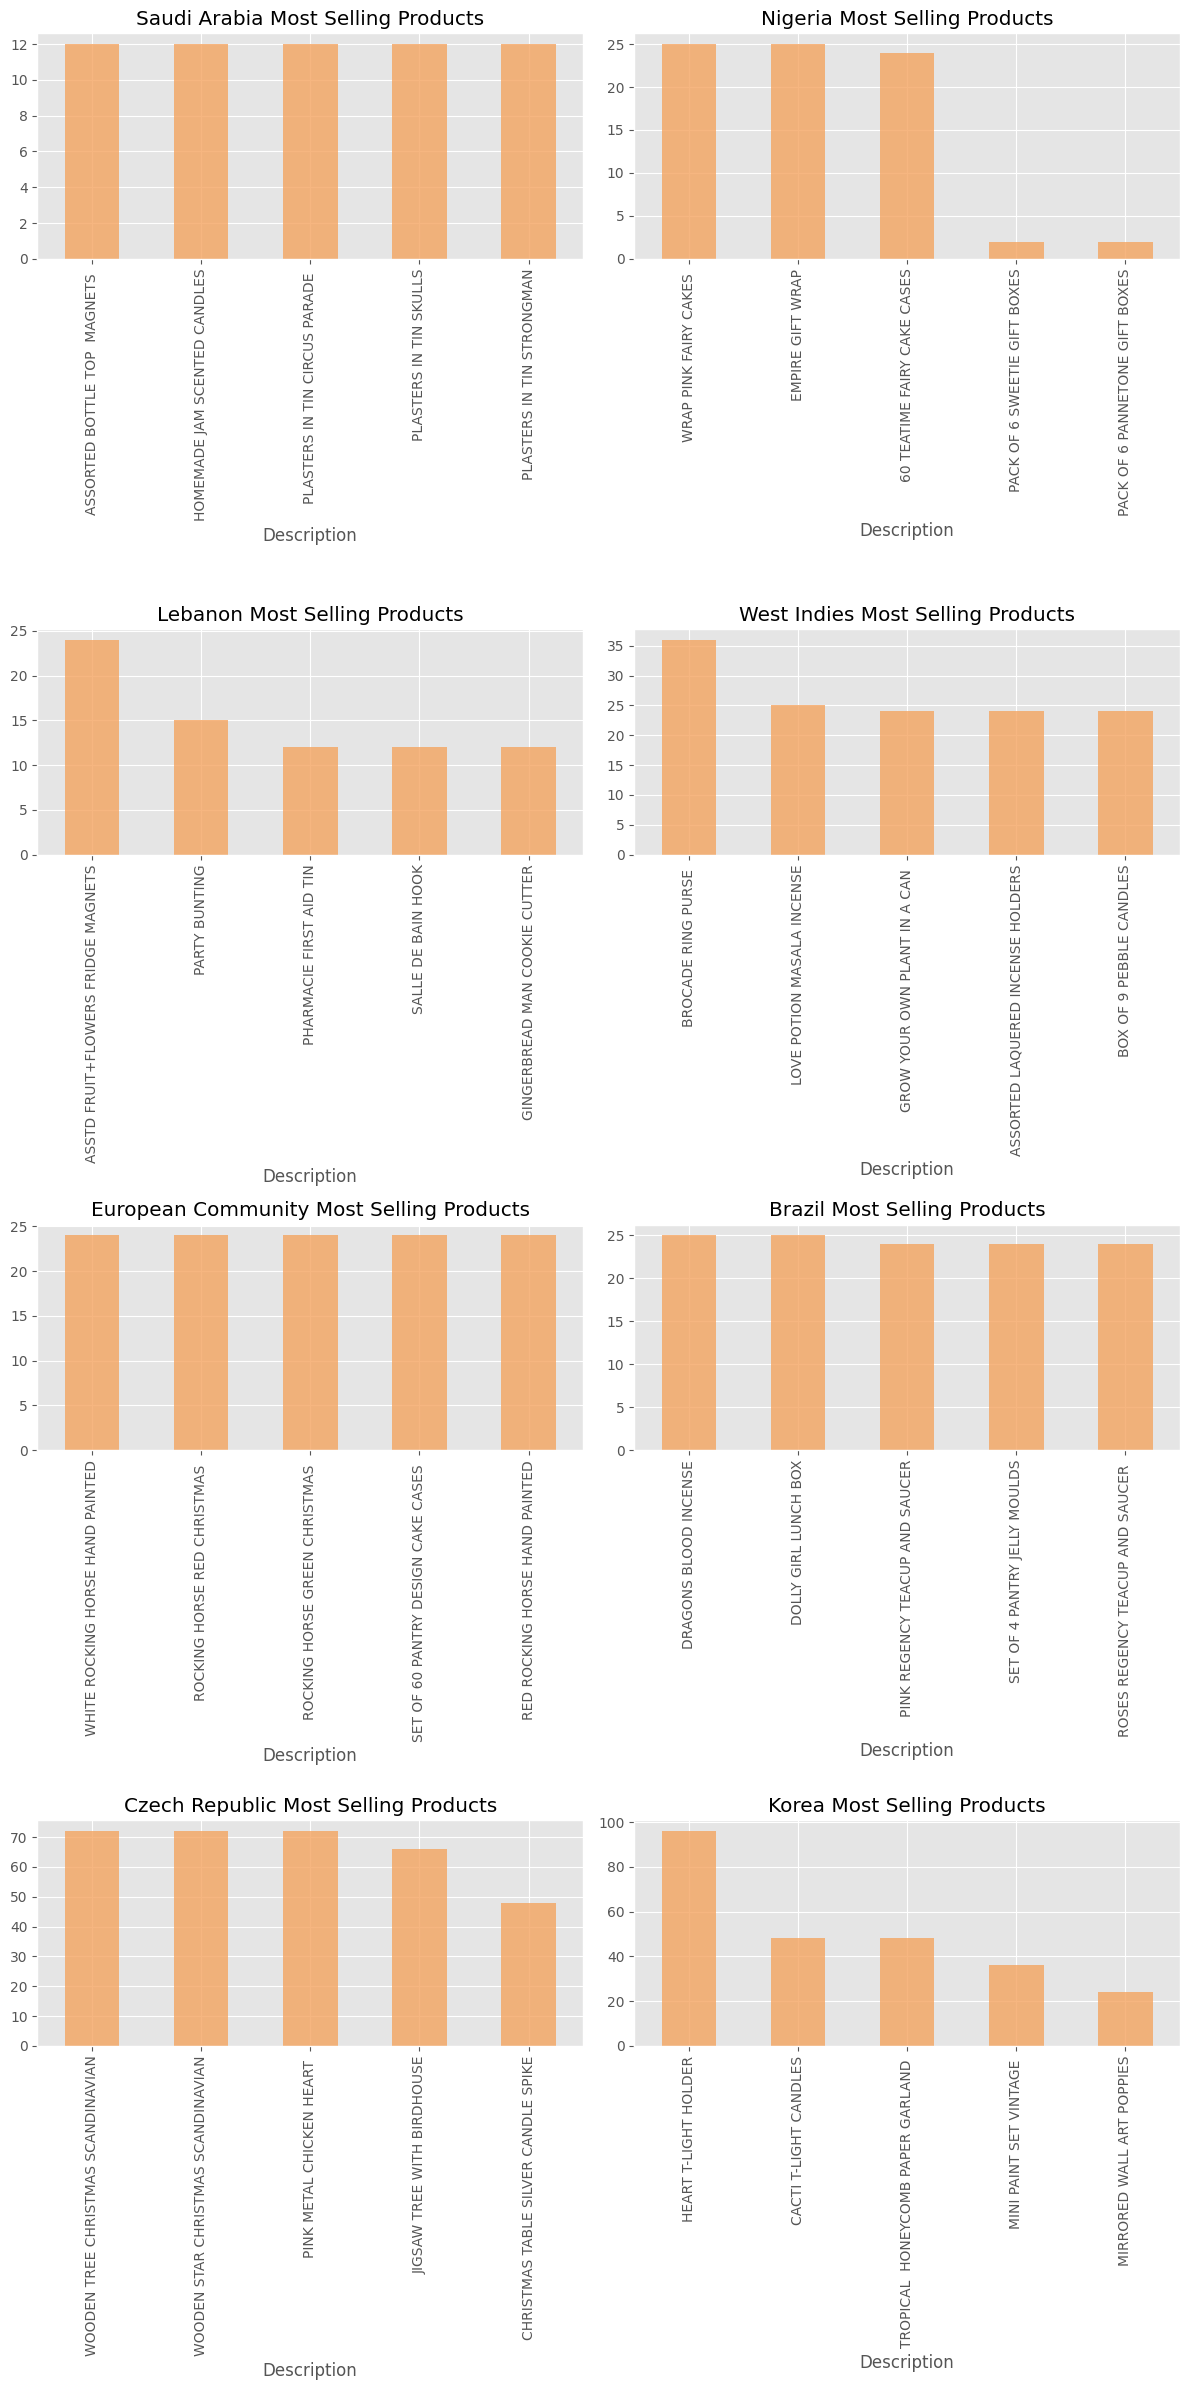

In [39]:
least_8_country = ["Saudi Arabia", "Nigeria", "Lebanon", "West Indies", "European Community", "Brazil", "Czech Republic", "Korea"]
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(least_8_country):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "sandybrown", alpha = 0.8)
    
    plt.tight_layout()

In [40]:
data_copy = data.copy()


In [168]:
#data=data_copy.copy()          # To resore data in case of any errors 

## Modelling of Life Time Value 

We will be using RFM 

### RFM Model 

Before implementing using library, let us build a custom RFM model. Our idea is simple, we will find Recency, Frequency and Monetary value of each customer and then will use a custom metric to find RFM value 


#### RFM Method

Overview  
The RFM (Recency, Frequency, Monetary) method is a straightforward and widely used technique for customer segmentation and LTV prediction. It categorizes customers based on three key dimensions:

Recency (R): How recently a customer made a purchase. Customers who have purchased recently are generally more likely to make future purchases.

Frequency (F): How often a customer makes a purchase. Frequent buyers are often considered more valuable.

Monetary (M): How much money a customer spends. Higher spending customers are typically more valuable.

Key Components  
Recency: Time since the last purchase. Shorter time indicates higher recency.
Frequency: Number of purchases over a specific period. Higher frequency indicates a loyal customer.
Monetary: Total amount spent over a specific period. Higher spending indicates higher monetary value.

Application  
The RFM method segments customers into groups based on their RFM scores. These segments can then be analyzed to identify high-value customers, target marketing efforts, and optimize retention strategies. For example, a customer with high recency, frequency, and monetary scores is likely a valuable and engaged customer.

In [169]:
data["Total Amount"] = data["Quantity"]*data["Price"]

In [170]:
# Finding all details of user related to recency 
# We find recency of user by finding last max_date in the data -  the first transaction date 
ruser=abs(data['InvoiceDate'].max()-data.groupby('Customer ID').agg('InvoiceDate').min()).reset_index()
ruser.columns=['Customer ID', 'LastActive']
ruser['LastActive'] = ruser['LastActive'].dt.days

In [171]:
# Finding all details related to frequency 
# Idea is to find a metric which is equal to no_of_transactions(purchase)/ time_duration
# We add 1 to avoid zero divison error 
fcount1=data.groupby('Customer ID')['Invoice'].nunique().reset_index()
fcount2=((data.groupby('Customer ID').agg('InvoiceDate').max()-data.groupby('Customer ID').agg('InvoiceDate').min()).map(lambda x:x.days) + 1).reset_index()
fuser = fcount1.join(fcount2.set_index('Customer ID'), on='Customer ID', how='inner')
fuser['Frequency']=fuser['Invoice']/fuser['InvoiceDate']

In [172]:
# Finding all details related to Monetary Value 
muser=data.groupby('Customer ID').agg('Total Amount').sum().reset_index()
muser['AOV'] = muser['Total Amount']/fuser['Invoice']

In [173]:
ruser.sort_values(by=['LastActive'], inplace=True)
ruser.reset_index(drop=True,inplace=True)
muser.sort_values(by=['AOV'], inplace=True)
muser.reset_index(drop=True,inplace=True)
fuser.sort_values(by=['Frequency'], inplace=True)
fuser.reset_index(drop=True,inplace=True)

In [174]:
# We will use quantiles to rank the scores we found above 
ptile=[0.2, 0.4, 0.6, 0.8]
rmap=np.quantile(ruser['LastActive'], ptile, method='inverted_cdf' ) 

fmap=np.quantile(fuser['Frequency'], ptile, method='inverted_cdf' ) 

mmap=np.quantile(muser['AOV'], ptile, method='inverted_cdf' ) 

In [175]:
def ranker(arr, mmap):
    if arr < mmap[0]:
        return 0
    elif mmap[1] > arr >= mmap[0]:
        return 1
    elif mmap[2] > arr >= mmap[1]:
        return 2
    elif mmap[3] > arr >= mmap[2]:
        return 3
    elif arr >= mmap[3]:
        return 4

def iranker(arr, mmap):
    if arr < mmap[0]:
        return 4
    elif mmap[1] > arr >= mmap[0]:
        return 3
    elif mmap[2] > arr >= mmap[1]:
        return 2
    elif mmap[3] > arr >= mmap[2]:
        return 1
    elif arr >= mmap[3]:
        return 0



In [176]:
muser['mScore'] = muser['AOV'].apply(lambda x: ranker(x, mmap))
fuser['fScore'] = fuser['Frequency'].apply(lambda x: ranker(x, fmap))
ruser['rScore'] = ruser['LastActive'].apply(lambda x: iranker(x, rmap))

In [177]:
temp_df = pd.merge(muser, ruser, on='Customer ID', how='inner' )
final=pd.merge(temp_df, fuser, on='Customer ID', how='inner' )

In [178]:
Wf, Wr, Wm = 1/3, 1/3, 1/3

final['OverallScore'] = Wm*final['mScore'] +  Wf*final['fScore'] +  Wr*final['rScore']

In [179]:
final

Customer ID  Total Amount        AOV  mScore  LastActive  rScore  \
0         14103.0          0.00      0.000       0         664       1   
1         14827.0          0.00      0.000       0         664       1   
2         13256.0          0.00      0.000       0          13       4   
3         16995.0          2.50      2.500       0         371       3   
4         14095.0          2.95      2.950       0         722       0   
...           ...           ...        ...     ...         ...     ...   
5937      13687.0      11880.84  11880.840       4         437       3   
5938      15098.0      79183.50  15836.700       4         181       4   
5939      15749.0      67532.70  16883.175       4         331       3   
5940      17399.0      25111.09  25111.090       4         539       2   
5941      16446.0     336951.10  84237.775       4         430       3   

      Invoice  InvoiceDate  Frequency  fScore  OverallScore  
0           1            1   1.000000       4      1.666667  
1           1            1   1.000000       4      1.666667  
2           1            1   1.000000       4      2.666667  
3           1            1   1.000000       4      2.333333  
4           1            1   1.000000       4      1.333333  
...       ...          ...        ...     ...           ...  
5937        1            1   1.000000       4      3.666667  
5938        5            1   5.000000       4      4.000000  
5939        4           98   0.040816       2      3.000000  
5940        1            1   1.000000       4      3.333333  
5941        4          431   0.009281       0      2.333333  

[5942 rows x 11 columns]

In [180]:
final.sort_values(by='OverallScore',ascending=False)

Customer ID  Total Amount          AOV  mScore  LastActive  rScore  \
5555      14222.0        683.17   683.170000       4         176       4   
5185      12436.0        509.01   509.010000       4          99       4   
5828      15004.0       1246.32  1246.320000       4         146       4   
5632      13356.0        768.24   768.240000       4          79       4   
5633      16480.0        769.29   769.290000       4          75       4   
...           ...           ...          ...     ...         ...     ...   
206       14119.0        203.27    67.756667       0         717       0   
363       14173.0        605.05    86.435714       0         730       0   
491       16148.0        402.87   100.717500       0         721       0   
976       13545.0        401.93   133.976667       0         738       0   
865       17155.0        892.46   127.494286       0         736       0   

      Invoice  InvoiceDate  Frequency  fScore  OverallScore  
5555        1            1   1.000000       4           4.0  
5185        1            1   1.000000       4           4.0  
5828        1            1   1.000000       4           4.0  
5632        1            1   1.000000       4           4.0  
5633        1            1   1.000000       4           4.0  
...       ...          ...        ...     ...           ...  
206         3          364   0.008242       0           0.0  
363         7          720   0.009722       0           0.0  
491         4          426   0.009390       0           0.0  
976         3          348   0.008621       0           0.0  
865         7          720   0.009722       0           0.0  

[5942 rows x 11 columns]

In [181]:
final

Customer ID  Total Amount        AOV  mScore  LastActive  rScore  \
0         14103.0          0.00      0.000       0         664       1   
1         14827.0          0.00      0.000       0         664       1   
2         13256.0          0.00      0.000       0          13       4   
3         16995.0          2.50      2.500       0         371       3   
4         14095.0          2.95      2.950       0         722       0   
...           ...           ...        ...     ...         ...     ...   
5937      13687.0      11880.84  11880.840       4         437       3   
5938      15098.0      79183.50  15836.700       4         181       4   
5939      15749.0      67532.70  16883.175       4         331       3   
5940      17399.0      25111.09  25111.090       4         539       2   
5941      16446.0     336951.10  84237.775       4         430       3   

      Invoice  InvoiceDate  Frequency  fScore  OverallScore  
0           1            1   1.000000       4      1.666667  
1           1            1   1.000000       4      1.666667  
2           1            1   1.000000       4      2.666667  
3           1            1   1.000000       4      2.333333  
4           1            1   1.000000       4      1.333333  
...       ...          ...        ...     ...           ...  
5937        1            1   1.000000       4      3.666667  
5938        5            1   5.000000       4      4.000000  
5939        4           98   0.040816       2      3.000000  
5940        1            1   1.000000       4      3.333333  
5941        4          431   0.009281       0      2.333333  

[5942 rows x 11 columns]

In [182]:
# RFM Model Using Library 
import lifetimes
rfm_summary = lifetimes.utils.summary_data_from_transaction_data(data, "Customer ID", "InvoiceDate", "Total Amount")
rfm_summary.sort_values(by='monetary_value', ascending=False)

frequency  recency      T  monetary_value
Customer ID                                           
16446.0            2.0    431.0  431.0      168471.050
15749.0            1.0     97.0  332.0       44534.300
12346.0           10.0    400.0  725.0       15508.760
15202.0            1.0      2.0  422.0       10796.840
18102.0           70.0    738.0  738.0        8816.312
...                ...      ...    ...             ...
17208.0            0.0      0.0  395.0           0.000
17207.0            0.0      0.0  652.0           0.000
17206.0            0.0      0.0   53.0           0.000
14946.0            0.0      0.0   14.0           0.000
16022.0            0.0      0.0  260.0           0.000

[5942 rows x 4 columns]

In [183]:
rfm_summary.reset_index(inplace = True)

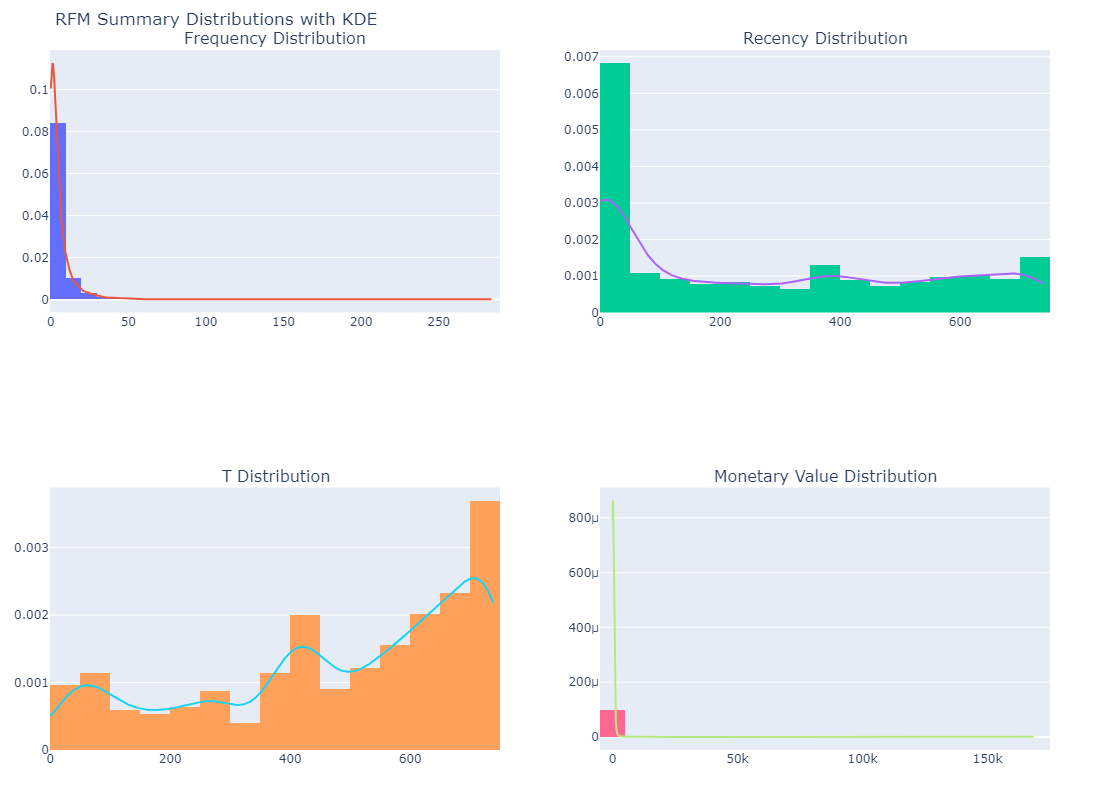

In [184]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import numpy as np
from scipy.stats import gaussian_kde

# Function to calculate KDE
def get_kde(x):
    kde = gaussian_kde(x)
    x_range = np.linspace(x.min(), x.max(), 1000)
    kde_values = kde(x_range)
    return x_range, kde_values

# Creating subplots
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=("Frequency Distribution", "Recency Distribution", "T Distribution", "Monetary Value Distribution"))

# Adding Frequency Distribution
x, kde_values = get_kde(rfm_summary["frequency"])
fig.add_trace(go.Histogram(x=rfm_summary["frequency"], nbinsx=30, histnorm='probability density', name='Frequency'), row=1, col=1)
fig.add_trace(go.Scatter(x=x, y=kde_values, mode='lines', name='Frequency KDE'), row=1, col=1)

# Adding Recency Distribution
x, kde_values = get_kde(rfm_summary["recency"])
fig.add_trace(go.Histogram(x=rfm_summary["recency"], nbinsx=30, histnorm='probability density', name='Recency'), row=1, col=2)
fig.add_trace(go.Scatter(x=x, y=kde_values, mode='lines', name='Recency KDE'), row=1, col=2)

# Adding T Distribution
x, kde_values = get_kde(rfm_summary["T"])
fig.add_trace(go.Histogram(x=rfm_summary["T"], nbinsx=30, histnorm='probability density', name='T'), row=2, col=1)
fig.add_trace(go.Scatter(x=x, y=kde_values, mode='lines', name='T KDE'), row=2, col=1)

# Adding Monetary Value Distribution
x, kde_values = get_kde(rfm_summary["monetary_value"])
fig.add_trace(go.Histogram(x=rfm_summary["monetary_value"], nbinsx=30, histnorm='probability density', name='Monetary Value'), row=2, col=2)
fig.add_trace(go.Scatter(x=x, y=kde_values, mode='lines', name='Monetary Value KDE'), row=2, col=2)

# Updating layout
fig.update_layout(
    title_text="RFM Summary Distributions with KDE",
    showlegend=False,
    height=800,
    width=1000,
    margin=dict(l=50, r=50, t=50, b=50)
)

# Show plot
fig.show()


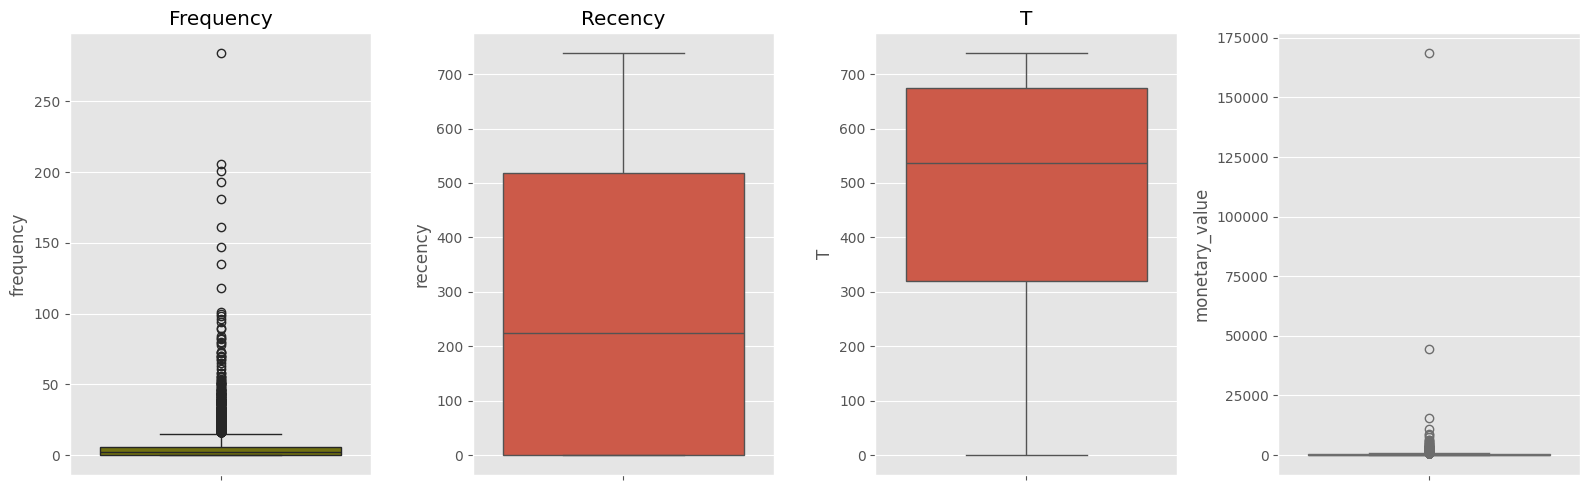

In [185]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(rfm_summary["frequency"], color = "olive")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(rfm_summary["recency"])
plt.title("Recency")
plt.subplot(143)
sns.boxplot(rfm_summary["T"])
plt.title("T")
plt.subplot(144)
sns.boxplot(rfm_summary["monetary_value"], color = "salmon")

plt.tight_layout()

In [186]:
data2=data.copy()
rfm_summary2=rfm_summary.copy()

### PARETO/NBD Model and GG Model

#### PARETO/NBD
Overview  
The Pareto/NBD (Negative Binomial Distribution) model is a popular statistical approach used in customer lifetime value prediction and customer churn analysis. It combines a Pareto distribution for modeling the frequency of customer transactions with a Negative Binomial Distribution to model the duration between transactions.

Key Components  
Frequency Model: The Pareto distribution is used to model the number of transactions or purchases a customer makes. It assumes that a small percentage of customers generate a large percentage of transactions.

Recency Model: The Negative Binomial Distribution models the time until a customer’s next transaction. It accounts for variability in the length of time between transactions.

Churn Model: The model also estimates the probability of a customer becoming inactive (churning) over time.

Application  
The Pareto/NBD model estimates the expected number of transactions and the expected time to the next transaction, which helps in predicting the future value of a customer.

#### GG Model
Overview  
The Gamma-Gamma (GG) model is used in conjunction with the Pareto/NBD model to estimate the monetary value of customer transactions. It focuses on predicting the average revenue per transaction for a customer, based on the transaction frequency and recency data from the Pareto/NBD model.

Key Components  
Monetary Value: The Gamma-Gamma model estimates the distribution of monetary values (revenue) of transactions, assuming that the transaction amounts follow a Gamma distribution.

Transaction Revenue: It models the relationship between the frequency of transactions and the revenue per transaction, allowing for predictions of future revenue based on past transaction data.


In [187]:
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
from sklearn.metrics import mean_squared_error, r2_score
import math
from math import sqrt

In [188]:
rfm_summary2

Customer ID  frequency  recency      T  monetary_value
0         12346.0       10.0    400.0  725.0    15508.760000
1         12347.0        7.0    402.0  404.0      717.398571
2         12348.0        4.0    363.0  438.0      449.310000
3         12349.0        4.0    717.0  735.0     1107.172500
4         12350.0        0.0      0.0  310.0        0.000000
...           ...        ...      ...    ...             ...
5937      18283.0       18.0    655.0  658.0      146.405556
5938      18284.0        1.0      2.0  431.0       25.000000
5939      18285.0        0.0      0.0  660.0        0.000000
5940      18286.0        2.0    247.0  723.0      470.740000
5941      18287.0        6.0    696.0  738.0      697.165000

[5942 rows x 5 columns]

In [189]:
rfm_summary2.loc[:, rfm_summary2.columns != 'Customer ID'] += 1  # Adding 1 to all numerical value fields to avoid zero-divion error

In [190]:
def cltv_predictor(df, month=3, plot=False):
    

    #Calculate the frequency and recency values as weekly
    df["recency"] = df["recency"] / 7
    df["T"] = df["T"] / 7
    
    df = df[(df['frequency'] > 1)]  # Customer with frequency greater than 1 i.e who has visited atleast once 

    # BG-NBD model
    bgf = BetaGeoFitter(penalizer_coef=0.001)
    bgf.fit(df['frequency'],
            df['recency'],
            df['T'])


    df["expected_purc_1_month"] = bgf.predict(4, df['frequency'], df['recency'],df['T'])   # For 4 weeks i.e 1 month 

    # 3. Establishment of the GAMMA-GAMMA model
    ggf = GammaGammaFitter(penalizer_coef=0.01)
    ggf.fit(df['frequency'], df['monetary_value'])
    df["expected_average_profit"] = ggf.conditional_expected_average_profit(df['frequency'],
                                                                                 df['monetary_value'])

    # Calculation of CLTV via BG-NBD and GG model.
    cltv = ggf.customer_lifetime_value(bgf,
                                       df['frequency'],
                                       df['recency'],
                                       df['T'],
                                       df['monetary_value'],
                                       time=month,
                                       freq="W",  # The frequency information of t.
                                       discount_rate=0.05)

     
   
    df_final = df.merge(cltv, left_index=True, right_index=True,  how="left")
    print(df_final.isna().sum())

   

    
    
    #If scaler is wanted to use
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(df_final[["clv"]])
    df_final["scaled_clv"] = scaler.transform(df_final[["clv"]])

    df_final["segment"] = pd.qcut(df_final["scaled_clv"], 5, labels=["Inactive", "Regular", "Silver-Privy", "Gold-Privy", "Platinum-Privy"])
    
    if plot:
        plot_probability_alive_matrix(bgf)
        
        plot_period_transactions(bgf)
        
        
    return df_final
    

In [191]:
import datetime as dt
import pandas as pd
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from sklearn.preprocessing import MinMaxScaler
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

Customer ID                0
frequency                  0
recency                    0
T                          0
monetary_value             0
expected_purc_1_month      0
expected_average_profit    0
clv                        0
dtype: int64


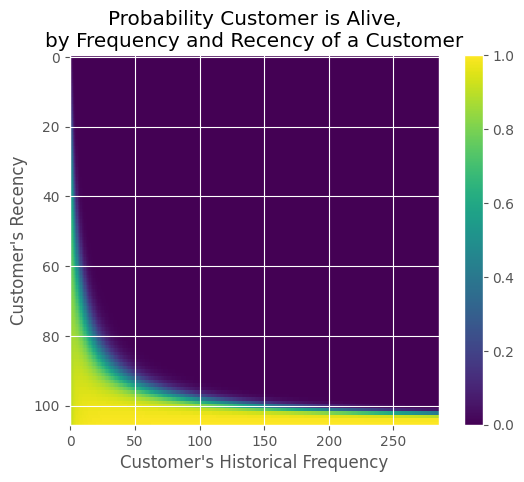

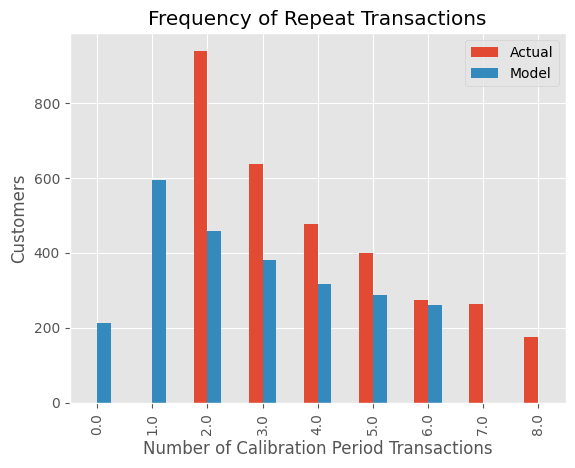

In [192]:
cltv_6month = cltv_predictor(rfm_summary2, month=6 , plot=True)

In [193]:
cltv_6month.sort_values(by='clv',ascending=False).head(10)

Customer ID  frequency     recency           T  monetary_value  \
4100      16446.0        3.0   61.714286   61.714286   168472.050000   
5756      18102.0       71.0  105.571429  105.571429     8817.312000   
2300      14646.0       97.0  105.285714  105.428571     5502.582604   
5104      17450.0       37.0   61.571429   62.714286     6143.483056   
1750      14096.0       17.0   14.000000   14.571429     4575.076875   
1810      14156.0      148.0  104.285714  105.571429     2247.675170   
2565      14911.0      285.0  105.428571  105.571429     1131.151761   
190       12536.0        3.0    7.571429    8.571429     8409.565000   
69        12415.0       25.0   72.000000   75.428571     5972.696250   
1348      13694.0       95.0  104.714286  105.142857     2124.512872   

      expected_purc_1_month  expected_average_profit            clv  \
4100               0.252463            179054.119363  242001.758840   
5756               2.456417              8839.433753  117277.571953   
2300               3.338071              5512.694790   99385.835577   
5104               2.038865              6173.157882   67286.835630   
1750               2.716942              4623.503149   64482.275450   
1810               5.023251              2250.395058   61052.813407   
2565               9.685417              1131.868433   59205.791877   
190                0.871326              8938.996638   39533.366434   
69                 1.188777              6015.496992   38389.006352   
1348               3.275772              2128.522745   37656.304336   

      scaled_clv         segment  
4100    1.000000  Platinum-Privy  
5756    0.484615  Platinum-Privy  
2300    0.410682  Platinum-Privy  
5104    0.278043  Platinum-Privy  
1750    0.266454  Platinum-Privy  
1810    0.252283  Platinum-Privy  
2565    0.244650  Platinum-Privy  
190     0.163360  Platinum-Privy  
69      0.158631  Platinum-Privy  
1348    0.155603  Platinum-Privy

In [194]:
cltv_6month['segment'].value_counts()

segment
Inactive          880
Silver-Privy      880
Platinum-Privy    880
Regular           879
Gold-Privy        879
Name: count, dtype: int64

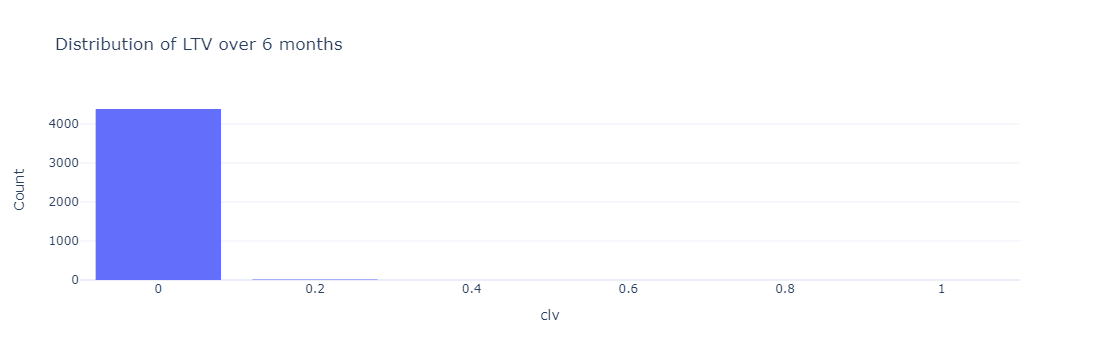

In [206]:
fig = px.histogram(cltv_6month, x='scaled_clv', nbins=10, title='Distribution of LTV over 6 months')
fig.update_layout(
    xaxis_title='clv',
    yaxis_title='Count',
    bargap=0.2,
    template='plotly_white'
)
fig.show()

In [196]:
from sklearn.cluster import KMeans

In [197]:
new_df = cltv_6month.copy()

In [198]:
new_df.drop(columns='segment',inplace=True)

In [199]:
new_df.dropna(inplace=True)

In [200]:
k_means_model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 1000)
k_model_fit = k_means_model.fit(new_df)
labels = k_means_model.labels_
centroids = k_means_model.cluster_centers_

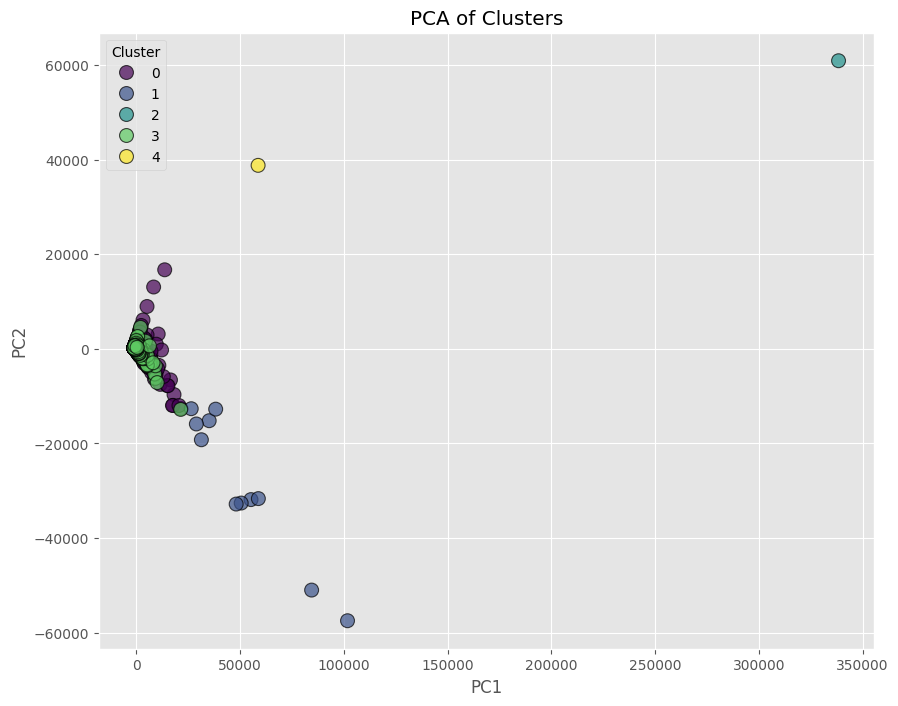

In [201]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
principal_components = pca.fit_transform(new_df)

# Create a new dataframe with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

k_means_model = KMeans(n_clusters=5, init="k-means++", max_iter=1000)
k_model_fit = k_means_model.fit(new_df)
labels = k_means_model.labels_
centroids = k_means_model.cluster_centers_

pca_df['Cluster'] = labels

# Plot the PCA result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.title('PCA of Clusters')
plt.show()

## Conclusion 

1. We can see that there is an almost equal distribution of points in each customer category.
2. The liftime value of inactive customer is almost near to zero. 